In [2]:
########################################
#       PROGRAMMING ASSIGNMENT 1       #
########################################
# Author: Akash Reddy A                #
# Roll No: EE17B001                    #
########################################

In [3]:
# Importing required packages

import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [22]:
# Parellelly setting up the means of the distributions for 2000 10-armed bandits

q_star = np.random.randn(10, 2000)

In [3]:
# Function to implement epsilon-greedy

def eps_greedy(epsilon):
    q = np.zeros((10,2000))    # Estimates initialised at 0 for values
    times_sampled = np.zeros((10,2000))    # Keeps track of number of times each arm has been sampled
    avg_reward = []    # List to store average rewards
    optim_percent = []    # List to store percentage optimum pick
    best_acts = np.argmax(q_star, axis = 0)
    for t in range(1000):
        sampler = np.random.uniform(0,1,2000)
        greedy_bool = sampler>epsilon
        act = np.argmax(q, axis = 0)*greedy_bool + np.random.randint(0,10,2000)*(np.invert(greedy_bool))   # Epsilon-greedily picking an action
        optim_percent.append(np.sum(act == best_acts)/2000*100)
        indices = (act, np.arange(2000))
        times_sampled[indices] = times_sampled[indices] + 1
        rt = np.random.normal(q_star[indices], 1)   # Evaluating the reward of the epsilon-greedy action
        avg_reward.append(np.mean(rt))
        q[indices] = q[indices] + (rt - q[indices])/times_sampled[indices]    # Stochastic averaging update of values
    return q, avg_reward, optim_percent

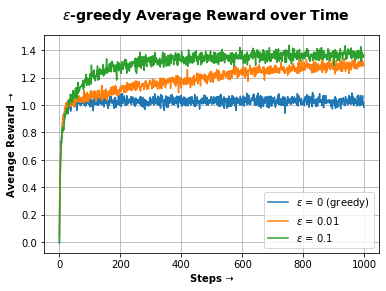

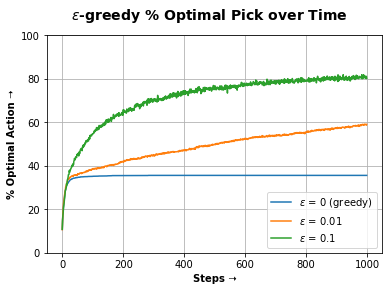

Time taken for eps-greedy (10 arms) = 0.40415477752685547


In [4]:
# Running epsilon-greedy with various values of epsilon

q1, avgr1, optim1 = eps_greedy(epsilon=0)
q2, avgr2, optim2 = eps_greedy(epsilon=0.01)
start = time.time()
q3, avgr3, optim3 = eps_greedy(epsilon=0.1)
end = time.time()   # Evaluating time taken for running epsilon-greedy

plt.plot(avgr1, label = '$\epsilon$ = 0 (greedy)')
plt.plot(avgr2, label = '$\epsilon$ = 0.01')
plt.plot(avgr3, label = '$\epsilon$ = 0.1')
plt.legend(loc='lower right')
plt.suptitle('$\epsilon$-greedy Average Reward over Time', fontweight = 'bold', fontsize = 14)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

plt.plot(optim1, label = '$\epsilon$ = 0 (greedy)')
plt.plot(optim2, label = '$\epsilon$ = 0.01')
plt.plot(optim3, label = '$\epsilon$ = 0.1')
plt.legend(loc='lower right')
plt.suptitle('$\epsilon$-greedy % Optimal Pick over Time', fontweight = 'bold', fontsize = 14)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('% Optimal Action \u279d', fontweight = 'bold')
plt.ylim(0,100)
plt.grid(True)
plt.show()

eps_greedy_time = end-start
print("Time taken for eps-greedy (10 arms) = "+str(eps_greedy_time))

In [5]:
# Function to implement softmax

def softmax(temp):
    q = np.zeros((10,2000))    # Estimates initialised at 0 for values
    times_sampled = np.zeros((10,2000))    # Keeps track of number of times each arm has been sampled
    avg_reward = []
    optim_percent = []
    best_acts = np.argmax(q_star, axis = 0)
    for t in range(1000):
        gibbs = np.exp(q/temp)/np.sum(np.exp(q/temp), axis = 0)
        gibbs = np.cumsum(gibbs, axis = 0)
        sampler = np.random.uniform(0,1,2000)
        act_bool = sampler < gibbs    
        act = np.argmax(act_bool, axis = 0)    # Using a uniform distribution and the cumulative probability values to sample an action
        optim_percent.append(np.sum(act == best_acts)/2000*100)
        indices = (act, np.arange(2000))
        times_sampled[indices] = times_sampled[indices] + 1
        rt = np.random.normal(q_star[indices], 1)
        avg_reward.append(np.mean(rt))
        q[indices] = q[indices] + (rt - q[indices])/times_sampled[indices]    # Stochastic averaging update
    return q, avg_reward, optim_percent

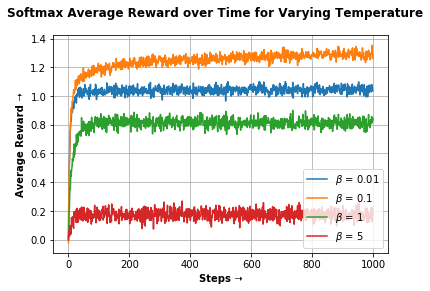

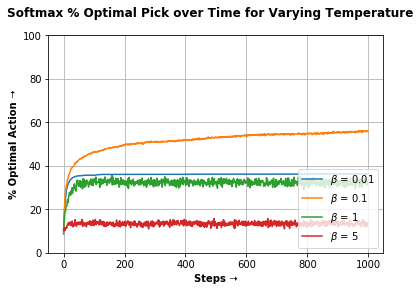

Time taken for softmax (10 arms) = 0.5373361110687256


In [6]:
# Running softmax for various temperatures

q1, avgr1, optim1 = softmax(temp = 0.01)
start = time.time()
q2, avgr2, optim2 = softmax(temp = 0.1)
end = time.time()
q3, avgr3, optim3 = softmax(temp = 1)
q4, avgr4, optim4 = softmax(temp = 5)

plt.plot(avgr1, label = '$\\beta$ = 0.01')
plt.plot(avgr2, label = '$\\beta$ = 0.1')
plt.plot(avgr3, label = '$\\beta$ = 1')
plt.plot(avgr4, label = '$\\beta$ = 5')
plt.legend(loc='lower right')
plt.suptitle('Softmax Average Reward over Time for Varying Temperature', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

plt.plot(optim1, label = '$\\beta$ = 0.01')
plt.plot(optim2, label = '$\\beta$ = 0.1')
plt.plot(optim3, label = '$\\beta$ = 1')
plt.plot(optim4, label = '$\\beta$ = 5')
plt.legend(loc='lower right')
plt.suptitle('Softmax % Optimal Pick over Time for Varying Temperature', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('% Optimal Action \u279d', fontweight = 'bold')
plt.ylim(0,100)
plt.grid(True)
plt.show()

softmax_time = end-start
print("Time taken for softmax (10 arms) = "+str(softmax_time))

In [7]:
# Function to implement UCB1

def ucb():
    q = np.random.normal(q_star, 1)    # All arms sampled once
    times_sampled = np.ones((10,2000))    # Initialised at ones and not zeros because all arms have been picked once
    avg_reward = np.mean(q, axis = 1).tolist()  
    optim_percent = []
    best_acts = np.argmax(q_star, axis = 0)
    for t in range(1000):
        act = np.argmax(q + np.sqrt(2*math.log(t+10)/times_sampled), axis = 0)
        optim_percent.append(np.sum(act == best_acts)/2000*100)
        indices = (act, np.arange(2000))
        times_sampled[indices] = times_sampled[indices] + 1
        rt = np.random.normal(q_star[indices], 1)
        avg_reward.append(np.mean(rt))
        q[indices] = q[indices] + (rt - q[indices])/times_sampled[indices]    # Stochastic averaging update
    return q, avg_reward, optim_percent

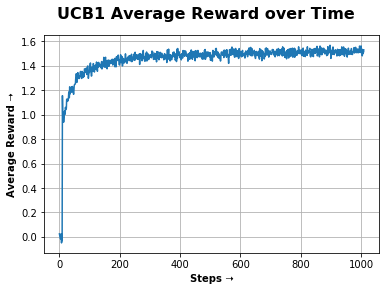

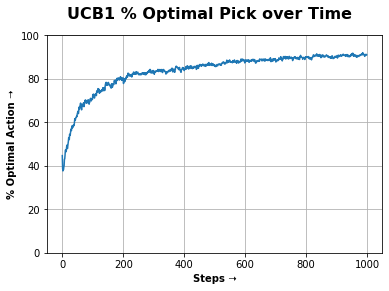

Time taken for UCB1 (10 arms) = 0.38492822647094727


In [8]:
# Running UCB1

start = time.time()
q1, avgr1, optim1 = ucb()
end = time.time()

plt.plot(avgr1)
plt.suptitle('UCB1 Average Reward over Time', fontweight = 'bold', fontsize = 16)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

plt.plot(optim1)
plt.suptitle('UCB1 % Optimal Pick over Time', fontweight = 'bold', fontsize = 16)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('% Optimal Action \u279d', fontweight = 'bold')
plt.grid(True)
plt.ylim(0,100)
plt.show()

ucb_time = end-start
print("Time taken for UCB1 (10 arms) = "+str(ucb_time))

In [24]:
# Function to implement Median Elimination
# Here, the matrix of rewards and runs has been used in the transposed form, because it is easier to reshape the matrix into the form that we need (2000 runs * half of the actions) after the lower half of arms has been parallelly removed from each of the 2000 bandits

def median_elim(epsilon, delta):
    eps_l = epsilon/4
    del_l = delta/2
    avg_reward = []
    q = np.zeros((2000,10))
    best_q_star = np.transpose(q_star)
    count = 0
    while True:
        times = (4/eps_l**2) * math.log(3/del_l)
        c = 0
        for _ in range(math.floor(times)):
            c = c + 1
            rt = np.random.normal(best_q_star, 1)
            q = q + (rt-q)/c    # Stochastic averaging update: each time step is treated as one pull of one arm
            avg_reward.append(np.mean(rt, axis = 0).tolist())
        if q.shape[1] == 1:
            break
        med = np.median(q, axis = 1)
        indices = np.transpose(np.transpose(q)>=med)    # Lower half of arms removed, but all the remaining arms of all bandits are in a 1-D array now
        best_q_star = best_q_star[indices].reshape(-1,math.ceil(q.shape[1]/2))    
        q = q[indices].reshape(-1,math.ceil(q.shape[1]/2))    # Reshaping the matrix into (no. of bandits * half of the arms)
        eps_l = 0.75*eps_l
        del_l = 0.5*del_l
        print("Round " + str(count) + " done...")
    avg_reward = [reward for sublist in avg_reward for reward in sublist]   # Flattening list of average rewards
    return best_q_star, avg_reward

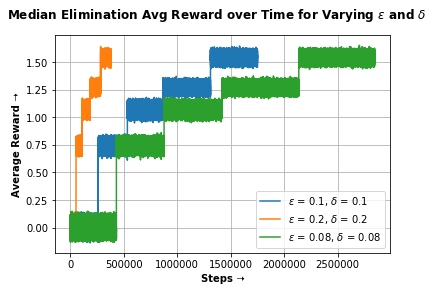

In [27]:
# Running Median Elimination for various values of epsilon and delta

best_q1, avgr1 = median_elim(epsilon = 0.1, delta = 0.1)
best_q2, avgr2 = median_elim(epsilon = 0.2, delta = 0.2)
best_q3, avgr3 = median_elim(epsilon = 0.08, delta = 0.08)

plt.plot(avgr1, label = "$\epsilon$ = 0.1, $\delta$ = 0.1")
plt.plot(avgr2, label = "$\epsilon$ = 0.2, $\delta$ = 0.2")
plt.plot(avgr3, label = "$\epsilon$ = 0.08, $\delta$ = 0.08")
plt.legend(loc = "lower right")
plt.suptitle('Median Elimination Avg Reward over Time for Varying $\epsilon$ and $\delta$', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

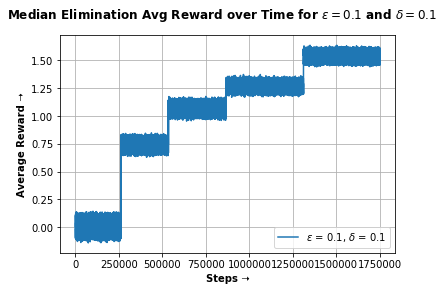

In [25]:
# Running Median Elimination for epsilon and delta = 0.1

start = time.time()
best_q, avgr = median_elim(epsilon = 0.1, delta = 0.1)
end = time.time()

plt.plot(avgr, label = "$\epsilon$ = 0.1, $\delta$ = 0.1")
plt.legend(loc = "lower right")
plt.suptitle('Median Elimination Avg Reward over Time for $\epsilon = 0.1$ and $\delta = 0.1$', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

me_time = end-start
print("Time taken for Median Elimination (10 arms) = "+str(me_time))

In [30]:
# Parellelly setting up the means of the distributions for 2000 1000-armed bandits

q_star = np.random.randn(1000, 2000)

In [12]:
# Function to implement epsilon-greedy for 1000 arms

def eps_greedy1000(epsilon):
    q = np.zeros((1000,2000))    # Estimates initialised at 0 for values
    times_sampled = np.zeros((1000,2000))    # Keeps track of number of times each arm has been sampled
    avg_reward = []    # List to store average rewards
    optim_percent = []    # List to store percentage optimum pick
    best_acts = np.argmax(q_star, axis = 0)
    for t in range(1000):
        sampler = np.random.uniform(0,1,2000)
        greedy_bool = sampler>epsilon
        act = np.argmax(q, axis = 0)*greedy_bool + np.random.randint(0,1000,2000)*(np.invert(greedy_bool))   # Epsilon-greedily picking an action
        optim_percent.append(np.sum(act == best_acts)/2000*100)
        indices = (act, np.arange(2000))
        times_sampled[indices] = times_sampled[indices] + 1
        rt = np.random.normal(q_star[indices], 1)   # Evaluating the reward of the epsilon-greedy action
        avg_reward.append(np.mean(rt))
        q[indices] = q[indices] + (rt - q[indices])/times_sampled[indices]    # Stochastic averaging update of values
    return q, avg_reward, optim_percent

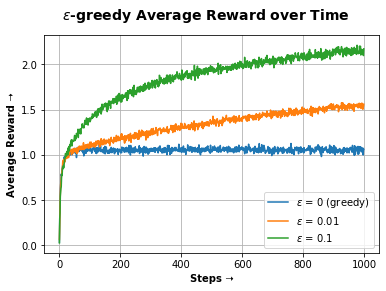

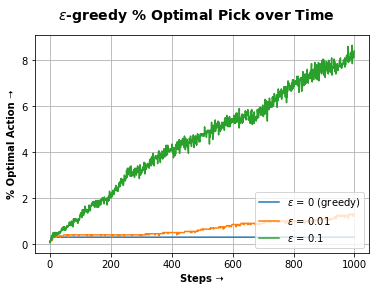

Time taken for eps-greedy (1000 arms) = 8.110805034637451


In [13]:
# Running epsilon-greedy on 1000 arms

q1, avgr1, optim1 = eps_greedy1000(epsilon=0)
q2, avgr2, optim2 = eps_greedy1000(epsilon=0.01)
start = time.time()
q3, avgr3, optim3 = eps_greedy1000(epsilon=0.1)
end = time.time()

plt.plot(avgr1, label = '$\epsilon$ = 0 (greedy)')
plt.plot(avgr2, label = '$\epsilon$ = 0.01')
plt.plot(avgr3, label = '$\epsilon$ = 0.1')
plt.legend(loc='lower right')
plt.suptitle('$\epsilon$-greedy Average Reward over Time', fontweight = 'bold', fontsize = 14)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

plt.plot(optim1, label = '$\epsilon$ = 0 (greedy)')
plt.plot(optim2, label = '$\epsilon$ = 0.01')
plt.plot(optim3, label = '$\epsilon$ = 0.1')
plt.legend(loc='lower right')
plt.suptitle('$\epsilon$-greedy % Optimal Pick over Time', fontweight = 'bold', fontsize = 14)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('% Optimal Action \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

eps_greedy1000_time = end-start
print("Time taken for eps-greedy (1000 arms) = "+str(eps_greedy1000_time))

In [14]:
# Function to implement softmax on 1000 arms

def softmax1000(temp):
    q = np.zeros((1000,2000))    # Estimates initialised at 0 for values
    times_sampled = np.zeros((1000,2000))    # Keeps track of number of times each arm has been sampled
    avg_reward = []
    optim_percent = []
    best_acts = np.argmax(q_star, axis = 0)
    for t in range(1000):
        gibbs = np.exp(q/temp)/np.sum(np.exp(q/temp), axis = 0)
        gibbs = np.cumsum(gibbs, axis = 0)
        sampler = np.random.uniform(0,1,2000)
        act_bool = sampler < gibbs
        act = np.argmax(act_bool, axis = 0)    # Using a uniform distribution and the cumulative probability values to sample an action
        optim_percent.append(np.sum(act == best_acts)/2000*100)
        indices = (act, np.arange(2000))
        times_sampled[indices] = times_sampled[indices] + 1
        rt = np.random.normal(q_star[indices], 1)
        avg_reward.append(np.mean(rt))
        q[indices] = q[indices] + (rt - q[indices])/times_sampled[indices]    # Stochastic averaging update
    return q, avg_reward, optim_percent

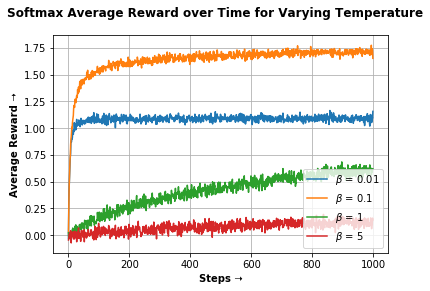

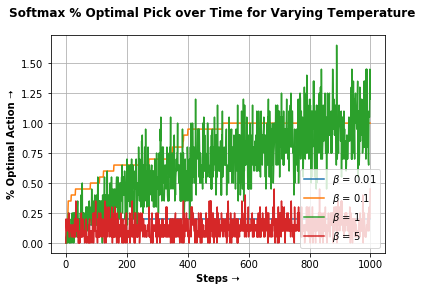

Time taken for softmax (1000 arms) = 54.05052828788757


In [15]:
# Running softmax with various temperature values on 1000 arms

q1, avgr1, optim1 = softmax1000(temp = 0.01)
start = time.time()
q2, avgr2, optim2 = softmax1000(temp = 0.1)
end = time.time()
q3, avgr3, optim3 = softmax1000(temp = 1)
q4, avgr4, optim4 = softmax1000(temp = 5)

plt.plot(avgr1, label = '$\\beta$ = 0.01')
plt.plot(avgr2, label = '$\\beta$ = 0.1')
plt.plot(avgr3, label = '$\\beta$ = 1')
plt.plot(avgr4, label = '$\\beta$ = 5')
plt.legend(loc='lower right')
plt.suptitle('Softmax Average Reward over Time for Varying Temperature', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

plt.plot(optim1, label = '$\\beta$ = 0.01')
plt.plot(optim2, label = '$\\beta$ = 0.1')
plt.plot(optim3, label = '$\\beta$ = 1')
plt.plot(optim4, label = '$\\beta$ = 5')
plt.legend(loc='lower right')
plt.suptitle('Softmax % Optimal Pick over Time for Varying Temperature', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('% Optimal Action \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

softmax1000_time = end-start
print("Time taken for softmax (1000 arms) = "+str(softmax1000_time))

In [16]:
# Function to implement UCB1 on 1000 arms

def ucb1000():
    q = np.random.normal(q_star, 1)    # All arms sampled once
    times_sampled = np.ones((1000,2000))    # Initialised at ones and not zeros because all arms have been picked once
    avg_reward = np.mean(q, axis = 1).tolist()
    optim_percent = []
    best_acts = np.argmax(q_star, axis = 0)
    for t in range(1000):
        act = np.argmax(q + np.sqrt(2*math.log(t+1000)/times_sampled), axis = 0)
        optim_percent.append(np.sum(act == best_acts)/2000*100)
        indices = (act, np.arange(2000))
        times_sampled[indices] = times_sampled[indices] + 1
        rt = np.random.normal(q_star[indices], 1)
        avg_reward.append(np.mean(rt))
        q[indices] = q[indices] + (rt - q[indices])/times_sampled[indices]    # Stochastic averaging update
    return q, avg_reward, optim_percent

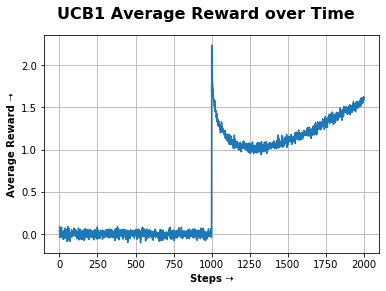

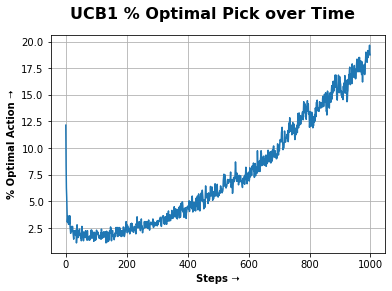

Time taken for UCB1 (1000 arms) = 29.198557138442993


In [20]:
# Running UCB1 on 1000 arms

start = time.time()
q1, avgr1, optim1 = ucb1000()
end = time.time()

plt.plot(avgr1)
plt.suptitle('UCB1 Average Reward over Time', fontweight = 'bold', fontsize = 16)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

plt.plot(optim1)
plt.suptitle('UCB1 % Optimal Pick over Time', fontweight = 'bold', fontsize = 16)
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('% Optimal Action \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

ucb1000_time = end-start
print("Time taken for UCB1 (1000 arms) = "+str(ucb1000_time))

In [11]:
# Function to implement Median Elimination
# Here, the matrix of rewards and runs has been used in the transposed form, because it is easier to reshape the matrix into the form that we need (2000 runs * half of the actions) after the lower half of arms has been parallelly removed from each of the 2000 bandits

# Reduced number of runs = 100 for the 1000-arm case
q_star = np.random.randn(1000, 100)

def median_elim1000(epsilon, delta):
    eps_l = epsilon/4
    del_l = delta/2
    avg_reward = []
    q = np.zeros((100,1000))
    best_q_star = np.transpose(q_star)
    count = 0
    while True:
        times = (4/eps_l**2) * math.log(3/del_l)
        c = 0
        for _ in range(math.floor(times)):
            c = c + 1
            rt = np.random.normal(best_q_star, 1)
            q = q + (rt-q)/c    # Stochastic averaging update: each time step is treated as one pull of one arm
            avg_reward.append(np.mean(rt, axis = 0).tolist())
        if q.shape[1] == 1:
            break
        med = np.median(q, axis = 1)
        indices = np.transpose(np.transpose(q)>=med)    # Lower half of arms removed, but all the remaining arms of all bandits are in a 1-D array now
        best_q_star = best_q_star[indices].reshape(-1,math.ceil(q.shape[1]/2))
        q = q[indices].reshape(-1,math.ceil(q.shape[1]/2))    # Reshaping the matrix into (no. of bandits * half of the arms)
        eps_l = 0.75*eps_l
        del_l = 0.5*del_l
        count = count + 1
        print("Round " + str(count) + " done...")
    avg_reward = [reward for sublist in avg_reward for reward in sublist]    # Flattening list of average rewards
    return best_q_star, avg_reward

Round 1 done...
Round 2 done...
Round 3 done...
Round 4 done...
Round 5 done...
Round 6 done...
Round 7 done...
Round 8 done...
Round 9 done...
Round 10 done...


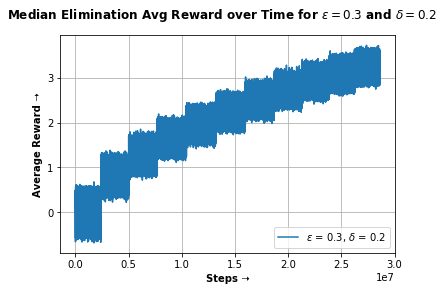

Time taken for Median Elimination (1000 arms) = 243.9287977218628


In [12]:
# Running Median Elimination on 1000 arms
start = time.time()
best_q1, avgr1 = median_elim1000(epsilon = 0.3, delta = 0.2)
# Larger epsilon and delta for faster execution of code (lesser sample complexity)
end = time.time()

plt.plot(avgr1, label = "$\epsilon$ = 0.3, $\delta$ = 0.2")
plt.legend(loc = "lower right")
plt.suptitle('Median Elimination Avg Reward over Time for $\epsilon = 0.3$ and $\delta = 0.2$', fontweight = 'bold')
plt.xlabel('Steps \u279d', fontweight = 'bold')
plt.ylabel('Average Reward \u279d', fontweight = 'bold')
plt.grid(True)
plt.show()

me1000_time = end-start
print("Time taken for Median Elimination (1000 arms) = "+str(me1000_time))